In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [27]:
file_id = "1F3sibqHTfoYDwlDQV2uZM2lhD1dY9ktv"
df = pd.read_csv(f"https://drive.google.com/uc?id={file_id}")
df.head()

Car Model  Mileage  Sell Price($)  Age(yrs)
0    BMW X5    69000          18000         6
1    BMW X5    35000          34000         3
2    BMW X5    57000          26100         5
3    BMW X5    22500          40000         2
4    BMW X5    46000          31500         4

In [3]:
le = LabelEncoder()

In [4]:
df["Car Model"] = le.fit_transform(df["Car Model"])
df.head()

Car Model  Mileage  Sell Price($)  Age(yrs)
0          1    69000          18000         6
1          1    35000          34000         3
2          1    57000          26100         5
3          1    22500          40000         2
4          1    46000          31500         4

In [5]:
import matplotlib.pyplot as plt

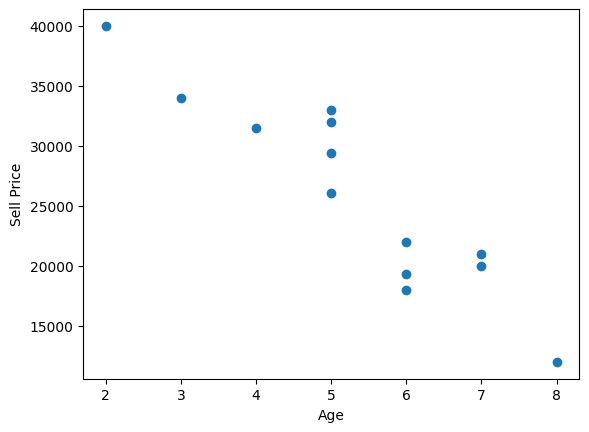

In [6]:
plt.scatter(df["Age(yrs)"],df["Sell Price($)"])
plt.xlabel("Age")
plt.ylabel("Sell Price")
plt.show()

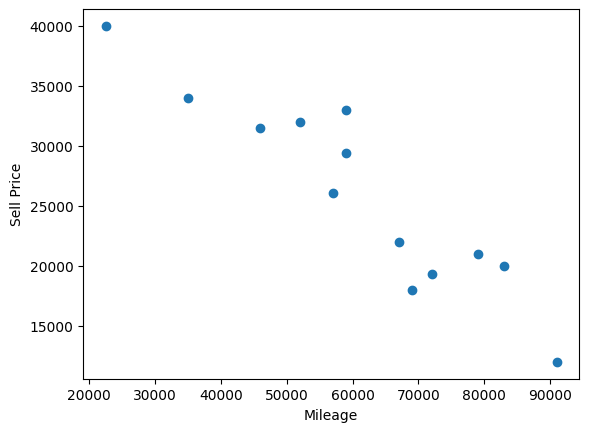

In [7]:
plt.scatter(df["Mileage"],df["Sell Price($)"])
plt.xlabel("Mileage")
plt.ylabel("Sell Price")
plt.show()

In [8]:
df

Car Model  Mileage  Sell Price($)  Age(yrs)
0           1    69000          18000         6
1           1    35000          34000         3
2           1    57000          26100         5
3           1    22500          40000         2
4           1    46000          31500         4
5           0    59000          29400         5
6           0    52000          32000         5
7           0    72000          19300         6
8           0    91000          12000         8
9           2    67000          22000         6
10          2    83000          20000         7
11          2    79000          21000         7
12          2    59000          33000         5

In [9]:
x = df[["Car Model", "Mileage", "Age(yrs)"]].values
y = df["Sell Price($)"].values

In [10]:
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [("Car Model", OneHotEncoder(), [0])], remainder = "passthrough")

In [12]:
x = ct.fit_transform(x)
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [13]:
x = x[:,1:]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [14]:
model = LinearRegression()

In [15]:
model.fit(x, y)

LinearRegression()

In [16]:
model.score(x, y)

0.9417050937281082

In [17]:
model.predict([[0, 1, 45000, 4]])

array([36991.31721062])

In [21]:
model.predict([[1, 0, 86000, 7]])

array([11080.74313219])

## END Of Project
#### Further code is to save the model and use it predict in future (i.e. not compulsory to run)

In [29]:
# import joblib

In [30]:
# joblib.dump(model, "lin_model")

In [31]:
# lg_model = joblib.load("lin_model")

In [32]:
# lg_model.predict([[1, 0, 86000, 7]])